In [16]:
import math
import numpy as np
np.set_printoptions(suppress=True, precision=5)

In [17]:
S0 = 36.
K = 40
r = 0.06
T = 1.0
sigma = 0.2

In [18]:
M = 100
I = 50000

In [19]:
dt = T / M
dt

0.01

In [20]:
df = math.exp(-r * dt)
df

0.9994001799640054

In [21]:
from numpy.random import default_rng
rng = default_rng(100)

In [22]:
rn = rng.standard_normal((M + 1, I))
rn

array([[-1.15755,  0.28976,  0.78085, ...,  1.88533,  0.04884, -0.76009],
       [ 0.46222, -1.39591,  0.13842, ..., -1.34929,  0.14552, -0.53244],
       [ 0.19834, -0.04029, -0.73432, ...,  2.13713,  0.17305, -0.34458],
       ...,
       [-0.21613, -1.30843,  0.72843, ..., -0.82476, -0.60227, -0.40118],
       [-2.13439, -1.2377 ,  0.58316, ...,  0.963  ,  0.8862 ,  0.77723],
       [ 2.12549, -0.41482,  0.71123, ...,  1.19293,  0.09788, -0.51728]])

In [23]:
S = np.zeros_like(rn)
S[0] = S0
S

array([[36., 36., 36., ..., 36., 36., 36.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t])

In [25]:
S

array([[36.     , 36.     , 36.     , ..., 36.     , 36.     , 36.     ],
       [36.34888, 35.02285, 36.11425, ..., 35.05552, 36.11937, 35.63293],
       [36.50795, 35.00864, 35.60197, ..., 36.60101, 36.2591 , 35.40236],
       ...,
       [42.68907, 39.76044, 40.68126, ..., 37.51564, 47.89271, 42.84558],
       [40.92148, 38.80381, 41.17498, ..., 38.2605 , 48.76863, 43.5342 ],
       [42.71562, 38.4986 , 41.78157, ..., 39.19999, 48.88375, 43.10338]])

In [26]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

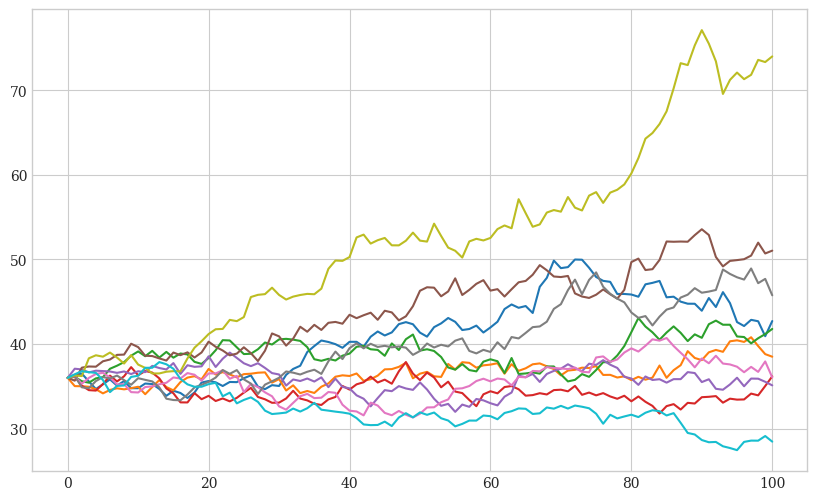

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])

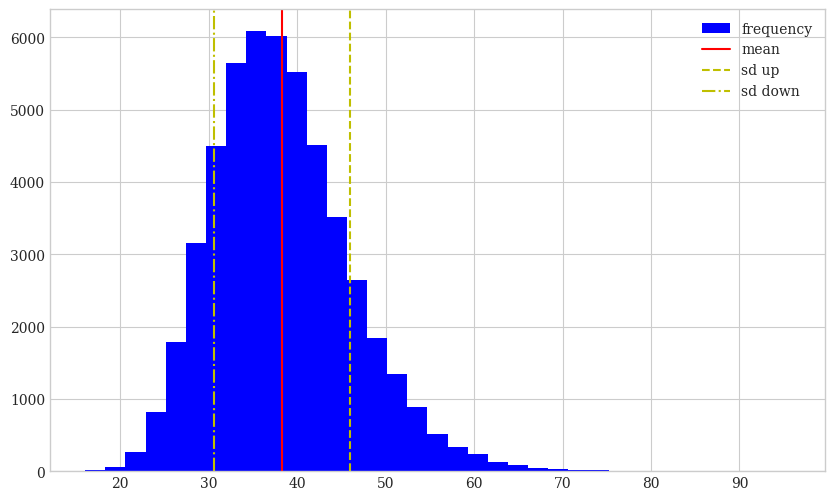

In [28]:
ST = S[-1]
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, color = 'b', label = 'frequency')
plt.axvline(ST.mean(), color = 'r', label = 'mean')
plt.axvline(ST.mean() + ST.std(), ls = '--', color = 'y', label = 'sd up')
plt.axvline(ST.mean() - ST.std(), ls = '-.', color = 'y', label = 'sd down')
plt.legend(loc = 0)


In [29]:
S0 * math.exp(r * T)

38.22611567563295

In [30]:
ST.mean()

np.float64(38.25248936738523)